## <font color="maroon"><h4 align="center">Handling Missing Data - replace method</font>

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("weather_data_missing_data.csv")
df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,-99999,7,Sunny
2,01-03-2017,28,-99999,Snow
3,01-04-2017,-99999,7,0
4,01-05-2017,32,-99999,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


**Replacing single value**

In [5]:
new_df = df.replace("-99999", value=np.NaN)
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,0
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


**Replacing list with single value**

In [4]:
new_df = df.replace(to_replace=["-99999","-88888"], value=0)
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,0,7,Sunny
2,01-03-2017,28,0,Snow
3,01-04-2017,0,7,0
4,01-05-2017,32,0,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


**Replacing per column**

In [5]:
#print(df.info())
new_df = df.replace({
        'temperature': "-99999",
        'windspeed': "-99999",
        'event': '0'
    }, np.nan)
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,NaN
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,NaN
7,01-06-2017,34 F,5,NaN
8,01-06-2017,34 C,20mph,NaN
9,01-06-2017,34,20mph,NaN


**Replacing by using mapping**

In [6]:
new_df = df.replace({
        '-99999': np.nan,
        'no event': 'Sunny',
    })
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,0
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


**Regex**

In [7]:
# when windspeed is 6 mph, 7 mph etc. & temperature is 32 F, 28 F etc.
new_df = df.replace({'temperature': '[A-Za-z]', 'windspeed': '[A-Za-z]'},'',regex=True) 
new_df      

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,-99999,7,Sunny
2,01-03-2017,28,-99999,Snow
3,01-04-2017,-99999,7,0
4,01-05-2017,32,-99999,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34,5,0
8,01-06-2017,34,20,0
9,01-06-2017,34,20,0


**Replacing list with another list**

In [8]:
df = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df

,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [9]:
print(df['score'].unique())
print(df['score'].value_counts())
new_df=df.replace(['poor', 'average', 'good', 'exceptional'], [1,2,3,4])
new_df

['exceptional' 'average' 'good' 'poor']
exceptional    2
average        2
good           1
poor           1
Name: score, dtype: int64


,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


In [11]:
# to calculate average
new_df.mean()
new_df["score"].mean()
#to find total number of rows
#new_df.shape
#new_df.count()
#new_df.info()
len(new_df.index)

C:\Users\dai\AppData\Local\Temp\ipykernel_12108\3353496598.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.mean()


6

In [12]:
#aad new column in the data frame
new_df["email"]=df["student"]+"@mycompany.com"
new_df

,score,student,email
0,4,rob,rob@mycompany.com
1,2,maya,maya@mycompany.com
2,3,parthiv,parthiv@mycompany.com
3,1,tom,tom@mycompany.com
4,2,julian,julian@mycompany.com
5,4,erica,erica@mycompany.com


In [28]:
#display only students with score >2
new_df[new_df["score"]>2] 

,score,student,email
0,4,rob,rob@mycompany.com
2,3,parthiv,parthiv@mycompany.com
5,4,erica,erica@mycompany.com


In [14]:
#how many distinct values are there in the frame new_df score column
print(df["score"].value_counts())

#new_df["score"].unique()
df[['score']].nunique()   #will show how many different values are there


exceptional    2
average        2
good           1
poor           1
Name: score, dtype: int64


score    4
dtype: int64

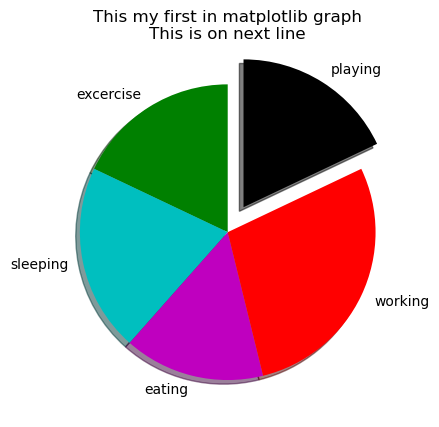

NameError: name 'x' is not defined

In [25]:
import matplotlib.pyplot as plt



#in stackplot we cannot give label so to ceate legend use following
slices=[7,8,6,11,7]
activities=['excercise', 'sleeping','eating','working','playing']
cols=['g','c','m','r','k']

#to draw piechart in anticlockwise direction
#counterclock=False

#plt.pie(slices,labels=activities,colors=cols,startangle=90,counterclock=False)
plt.pie(slices,labels=activities,colors=cols,shadow=True,explode=(0,0,0,0,0.2),startangle=90)

plt.title('This my first in matplotlib graph\nThis is on next line')
plt.show()




#plt.plot(x,y,label="First line")
#plt.plot(x1,y1,label="Second Line")
#plt.legend() #for legend add label in plot method


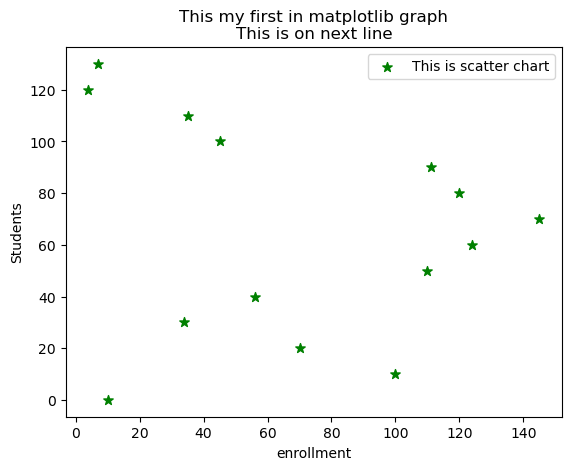

In [29]:
import matplotlib.pyplot as plt

enrollment=[10,100,70,34,56,110,124,145,120,111,45,35,4,7]
#classroom=[x for x in range(len(enrollment))
students=[0,10,20,30,40,50,60,70,80,90,100,110,120,130]


plt.scatter(enrollment,students,label="This is scatter chart",color="green",marker="*",s=50)#s=marker size
#plt.plot(enrollment,students,color="red",label="students data")


plt.xlabel('enrollment')
plt.ylabel('Students')
plt.legend()
plt.title('This my first in matplotlib graph\nThis is on next line')
plt.show()




#plt.plot(x,y,label="First line")
#plt.plot(x1,y1,label="Second Line")
#plt.legend() #for legend add label in plot method


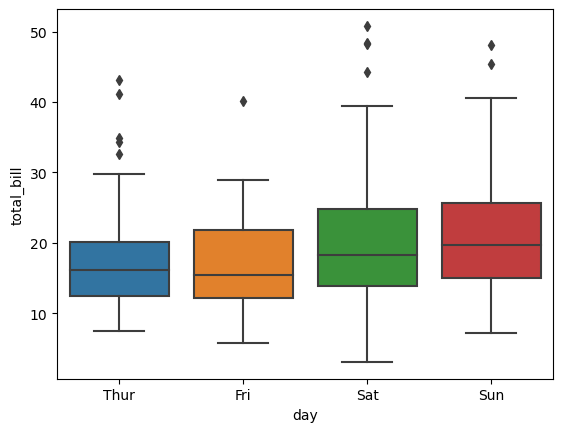

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


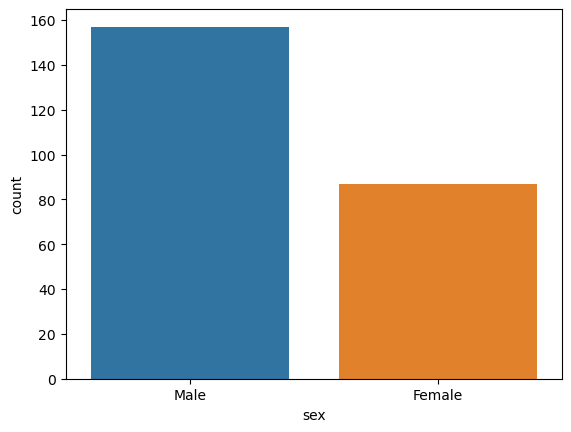

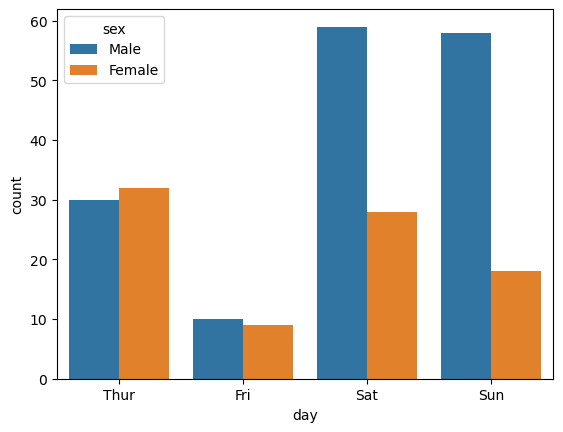

C:\Users\dai\AppData\Local\Temp\ipykernel_16552\1654302958.py:32: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: >

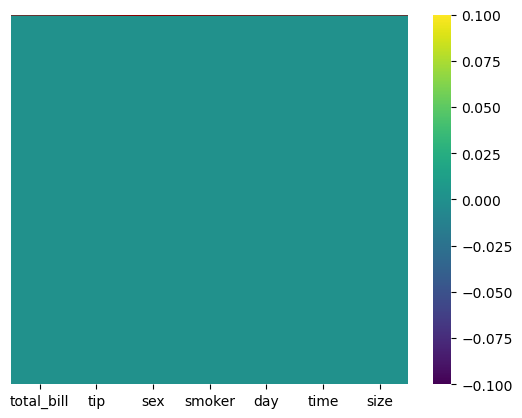

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 17 16:16:00 2021

@author: anilk
"""

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



import seaborn as sns
# Load the data

tips = sns.load_dataset("tips")

sns.boxplot(x='day',y='total_bill',data=tips)
plt.show()

tips.info()

sns.countplot(x="sex",data=tips)
plt.show()


sns.countplot(x="day",hue="sex",data=tips)
plt.show()

sns.distplot(x=tips['tip'],kde=True,color="darkred",bins=20)

sns.heatmap(tips.isnull(),yticklabels=False,cmap="viridis")


Hello World!


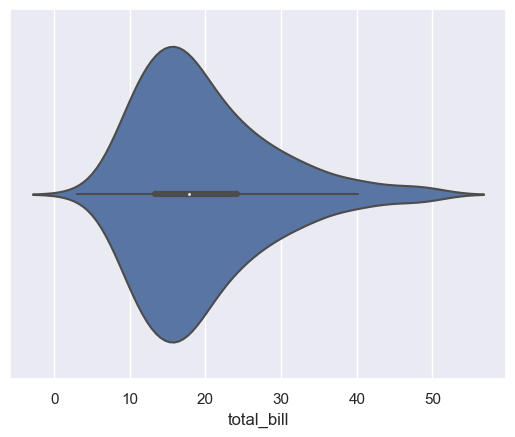

C:\Users\dai\AppData\Local\Temp\ipykernel_16552\1219853853.py:31: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='smoker', ylabel='count'>

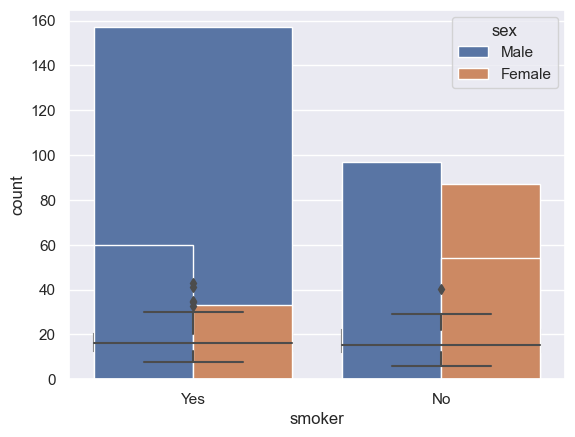

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 11 17:17:24 2019

@author: anilk
"""
print("Hello World!");

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



import seaborn as sns
# Load the data

tips = sns.load_dataset("tips")
#x=tips["total_bill"]
# Create violinplot

sns.violinplot(x = "total_bill", data=tips)
# Show the plot
plt.show()

sns.countplot(x="sex",data=tips)

sns.boxplot(x="day",y="total_bill",data=tips)

sns.distplot(tips["total_bill"],kde=False,bins=5,color="darkgreen")

sns.set(style="darkgrid")
sns.histplot(x="total_bill",data=tips,bins=5)

sns.countplot(x="smoker",data=tips,hue="sex")



Hello World!


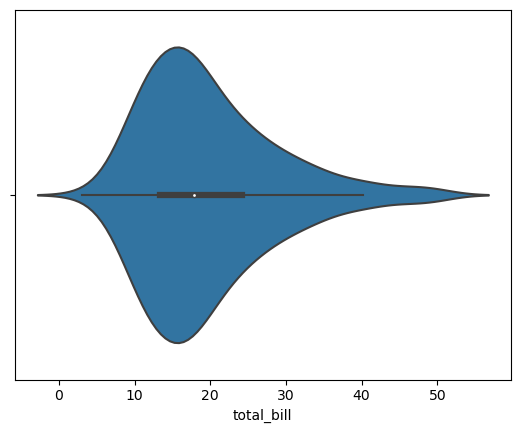

C:\Users\dai\AppData\Local\Temp\ipykernel_16552\1219853853.py:31: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='smoker', ylabel='count'>

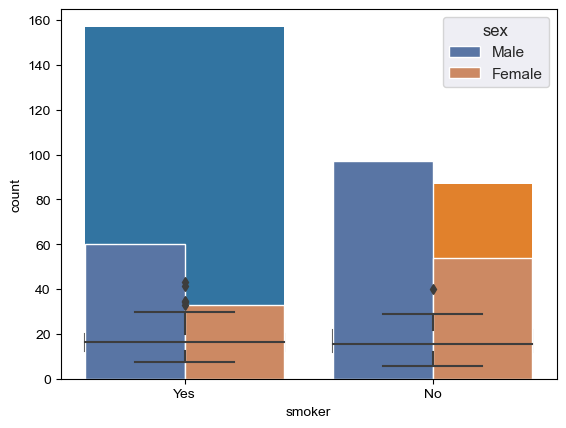

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 11 17:17:24 2019

@author: anilk
"""
print("Hello World!");

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



import seaborn as sns
# Load the data

tips = sns.load_dataset("tips")
#x=tips["total_bill"]
# Create violinplot

sns.violinplot(x = "total_bill", data=tips)
# Show the plot
plt.show()

sns.countplot(x="sex",data=tips)

sns.boxplot(x="day",y="total_bill",data=tips)

sns.distplot(tips["total_bill"],kde=False,bins=5,color="darkgreen")

sns.set(style="darkgrid")
sns.histplot(x="total_bill",data=tips,bins=5)

sns.countplot(x="smoker",data=tips,hue="sex")



In [33]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Hello World!


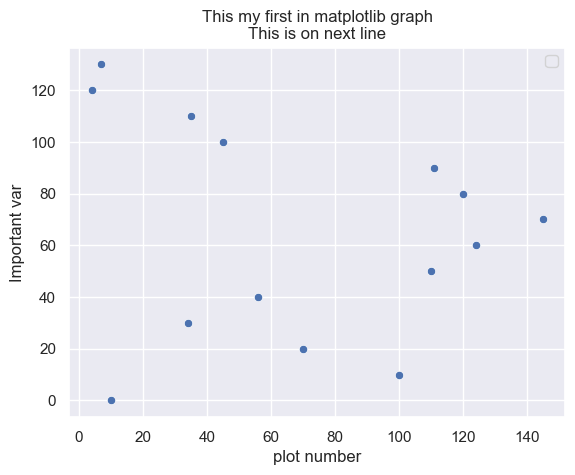

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov  7 14:31:15 2020

@author: anilk
"""
print("Hello World!");

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



enrollment=[10,100,70,34,56,110,124,145,120,111,45,35,4,7]
#classroom=[x for x in range(len(enrollment))
students=[0,10,20,30,40,50,60,70,80,90,100,110,120,130]
df=pd.DataFrame({"enrollments":enrollment,"student":students})
#plt.scatter(enrollment,students,label="This is scatter chart",color="green",marker="*",s=200)#s=marker size
#plt.plot(enrollment,students)
sns.scatterplot(x="enrollments", y="student" ,data=df)

plt.xlabel('plot number')
plt.ylabel('Important var')
plt.legend()
plt.title('This my first in matplotlib graph\nThis is on next line')
plt.show()

In [39]:
#pip install plotly
import plotly
from plotly.graph_objs import Scatter, Layout

plotly.offline.plot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="hello world")
})

SyntaxError: invalid syntax (3726652100.py, line 1)

In [9]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 10 10:46:29 2019

@author: anilk
"""
print("Hello World!");

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import plotly
import plotly.offline as py
import plotly.graph_objs as go


trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17],
    name='data1'
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9],
    name="data2"
)
data = [trace0, trace1]

py.offline.plot(data, filename = 'basic-line', auto_open=True)

Hello World!


C:\Users\dai\anaconda3\Lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'basic-line.html'

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 10 09:58:07 2019

@author: anilk
"""
print("Hello World!");

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import pandas as pd
#import plotly.plotly as py

import plotly
import plotly.offline as py
import plotly.graph_objs as go

df = pd.read_csv('https://raw.githubusercontent.com/yankev/test/master/life-expectancy-per-GDP-2007.csv')

americas = df[(df.continent=='Americas')]
europe = df[(df.continent=='Europe')]
#create one graph
trace_comp0 = go.Scatter(
    x=americas.gdp_percap,
    y=americas.life_exp,
    mode='markers',
    marker=dict(size=12,
                line={"width":1},
                color="navy"
               ),
    name='Americas',
    text=americas.country,
    )
#create another graph
trace_comp1 = go.Scatter(
    x=europe.gdp_percap,
    y=europe.life_exp,
    mode='markers',
    marker=dict(size=12,
                line=dict(width=1),
                color="red"
               ),
    name='Europe',
    text=europe.country,
        )
    
    
    
    
data_comp = [trace_comp0, trace_comp1]
layout_comp = go.Layout(
    title='Life Expectancy v. Per Capita GDP, 2007',
    hovermode='closest',
    xaxis=dict(
        title='GDP per capita (2000 dollars)',
        ticklen=5,
        zeroline=False,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Life Expectancy (years)',
        ticklen=5,
        gridwidth=2,
    ),
)
fig_comp = go.Figure(data=data_comp, layout=layout_comp)
py.offline.plot(fig_comp, filename='life-expectancy-per-GDP')
    

    

Hello World!


URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [38]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.
